In [51]:
## pandas 라이브러리를 사용하여 네이버 환율 정보를 가져오는 프로그램 ##

# 개발자 도구 : 검사 > 네트워크 > 문서> 머리글 > 요청 URL 복사하여 확인
#  예시) https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_USDKRW&page=10

import pandas as pd
import warnings                     # 워닝을 무시하는 설정
warnings.filterwarnings('ignore') 

# 사용자 입력으로 통화 유형을 입력 받음
code_in = int(input("통화 유형 선택하라 (0:USD, 1:EUR, 2:JPY)"))
currency_symbols = ['USD','EUR','JPY'] # 통화단위 리스트 형식 정의
currency_name = ['미달러','유로','엔화'] # 통화 설명도 넣고 싶다
code = currency_symbols[code_in]

df = pd.DataFrame()

for page_num in range(1, 11) :   # 1 ~ 10페이지
    # base_url ="https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_USDKRW&page=10"
    # base_url = f"https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_USDKRW&page={page_num}" # page_num를 변수로 변경 "" 앞에f 붙여서
    base_url = f"https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_{code}KRW&page={page_num}" # code를 변수로 변경 
    temp = pd.read_html(base_url, encoding='cp949', header=1) #  HTML 테이블을 데이터 프레임으로 변환
    
    df = pd.concat([df, temp[0]]) 
    # concat으로 페이지 별로 추가
    # temp  -> 는 [] 리스트에 들어있어서 # temp[0] -> 0번째 페이지

# 데이터 표시
print(f"=========={currency_name[code_in]} - 단위: {code}===============")
print(df.head(20))

==========미달러 - 단위: USD===============
           날짜   매매기준율  전일대비     사실 때     파실 때   보내실 때   받으실 때
0  2024.06.27  1386.5   8.0  1410.76  1362.24  1400.0  1373.0
1  2024.06.26  1394.5   2.5  1418.90  1370.10  1408.1  1380.9
2  2024.06.25  1392.0   4.0  1416.36  1367.64  1405.6  1378.4
3  2024.06.24  1388.0   3.0  1412.29  1363.71  1401.6  1374.4
4  2024.06.21  1391.0   1.0  1415.34  1366.66  1404.6  1377.4
5  2024.06.20  1392.0   9.0  1416.36  1367.64  1405.6  1378.4
6  2024.06.19  1383.0   1.0  1407.20  1358.80  1396.5  1369.5
7  2024.06.18  1382.0   0.0  1406.18  1357.82  1395.5  1368.5
8  2024.06.17  1382.0   7.0  1406.18  1357.82  1395.5  1368.5
9  2024.06.14  1389.0  11.0  1413.30  1364.70  1402.6  1375.4
0  2024.06.13  1378.0   5.0  1402.11  1353.89  1391.5  1364.5
1  2024.06.12  1373.0   7.0  1397.02  1348.98  1386.4  1359.6
2  2024.06.11  1380.0   4.0  1404.15  1355.85  1393.5  1366.5
3  2024.06.10  1376.0   5.0  1400.08  1351.92  1389.4  1362.6
4  2024.06.07  1381.0   8.0  14

In [52]:
# 입력받는 코드 연습을 해보자
code_in = int(input("통화 유형 선택하라 (0:USD, 1:EUR, 2:JPY)"))
currency_symbols = ['USD','EUR','JPY'] # 통화 별 - 사용자 입력을 받자구요
currency_name = ['미달러','유로','엔화'] # 설명도 넣고 싶다

currency_symbols[code_in] # 출력

'USD'

In [53]:
df

,날짜,매매기준율,전일대비,사실 때,파실 때,보내실 때,받으실 때
0,2024.06.27,1386.5,8.0,1410.76,1362.24,1400.0,1373.0
1,2024.06.26,1394.5,2.5,1418.90,1370.10,1408.1,1380.9
2,2024.06.25,1392.0,4.0,1416.36,1367.64,1405.6,1378.4
3,2024.06.24,1388.0,3.0,1412.29,1363.71,1401.6,1374.4
4,2024.06.21,1391.0,1.0,1415.34,1366.66,1404.6,1377.4
...,...,...,...,...,...,...,...
5,2024.02.05,1335.5,3.0,1358.87,1312.13,1348.5,1322.5
6,2024.02.02,1338.5,7.5,1361.92,1315.08,1351.6,1325.4
7,2024.02.01,1331.0,4.0,1354.29,1307.71,1344.0,1318.0
8,2024.01.31,1335.0,4.0,1358.36,1311.64,1348.0,1322.0


# 1. 전체 현황 하기
# 2. 월별 조회 하기

In [54]:
# .py 파일에 오전에 한것 펑션으로 만들기

# [데이타 수집 후 분석] 먼저 원하는 열만 선택 
#df.columns
df_total = df[['날짜', '매매기준율', '사실 때', '파실 때', '보내실 때', '받으실 때']]

df_total


,날짜,매매기준율,사실 때,파실 때,보내실 때,받으실 때
0,2024.06.27,1386.5,1410.76,1362.24,1400.0,1373.0
1,2024.06.26,1394.5,1418.90,1370.10,1408.1,1380.9
2,2024.06.25,1392.0,1416.36,1367.64,1405.6,1378.4
3,2024.06.24,1388.0,1412.29,1363.71,1401.6,1374.4
4,2024.06.21,1391.0,1415.34,1366.66,1404.6,1377.4
...,...,...,...,...,...,...
5,2024.02.05,1335.5,1358.87,1312.13,1348.5,1322.5
6,2024.02.02,1338.5,1361.92,1315.08,1351.6,1325.4
7,2024.02.01,1331.0,1354.29,1307.71,1344.0,1318.0
8,2024.01.31,1335.0,1358.36,1311.64,1348.0,1322.0


In [55]:
# 간단하게 chart를 그려보자 pandas 안에도 plot 이 있다.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html Examples For DataFrame:

# >>> df = pd.DataFrame({'length': [1.5, 0.5, 1.2, 0.9, 3],
# ...                   'width': [0.7, 0.2, 0.15, 0.2, 1.1]},
# ...                   index=['pig', 'rabbit', 'duck', 'chicken', 'horse']) # index가 무조건 'X 축'이다.
# >>> plot = df.plot(title="DataFrame Plot")
# 원본 참조용
df_total.info()

# 1. to_datetime
# 2. str[] , as type?
# 3. 합한 것 


<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      100 non-null    object 
 1   매매기준율   100 non-null    float64
 2   사실 때    100 non-null    float64
 3   파실 때    100 non-null    float64
 4   보내실 때   100 non-null    float64
 5   받으실 때   100 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.5+ KB


In [56]:
# 원본 카피
df_total_chart = df_total.copy()

In [57]:
# 날짜를 인덱스로 만들기 => pandas 's plot 에서 index가 X축
df_total_chart = df_total_chart.set_index('날짜')
df_total_chart


,매매기준율,사실 때,파실 때,보내실 때,받으실 때
날짜,,,,,
2024.06.27,1386.5,1410.76,1362.24,1400.0,1373.0
2024.06.26,1394.5,1418.90,1370.10,1408.1,1380.9
2024.06.25,1392.0,1416.36,1367.64,1405.6,1378.4
2024.06.24,1388.0,1412.29,1363.71,1401.6,1374.4
2024.06.21,1391.0,1415.34,1366.66,1404.6,1377.4
...,...,...,...,...,...
2024.02.05,1335.5,1358.87,1312.13,1348.5,1322.5
2024.02.02,1338.5,1361.92,1315.08,1351.6,1325.4
2024.02.01,1331.0,1354.29,1307.71,1344.0,1318.0


In [58]:
# 매매기준율의 정열 순서 바꾸기
df_total_chart = df_total_chart[::-1] 
df_total_chart

,매매기준율,사실 때,파실 때,보내실 때,받으실 때
날짜,,,,,
2024.01.30,1331.0,1354.29,1307.71,1344.0,1318.0
2024.01.31,1335.0,1358.36,1311.64,1348.0,1322.0
2024.02.01,1331.0,1354.29,1307.71,1344.0,1318.0
2024.02.02,1338.5,1361.92,1315.08,1351.6,1325.4
2024.02.05,1335.5,1358.87,1312.13,1348.5,1322.5
...,...,...,...,...,...
2024.06.21,1391.0,1415.34,1366.66,1404.6,1377.4
2024.06.24,1388.0,1412.29,1363.71,1401.6,1374.4
2024.06.25,1392.0,1416.36,1367.64,1405.6,1378.4


<Axes: xlabel='날짜'>

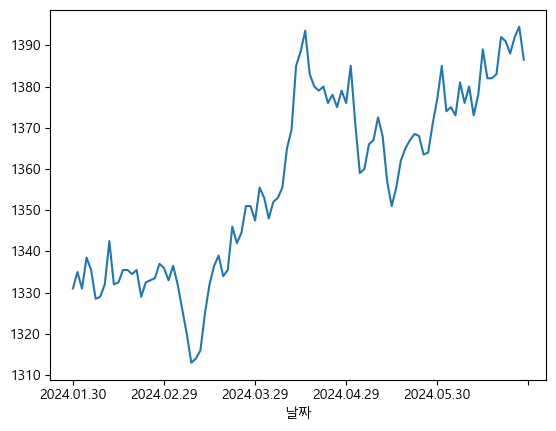

In [59]:
# 이제 챠트 그리기 - '매매기준율'을 기준으로.
df_total_chart['매매기준율'].plot()

In [60]:
# 한글
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

<Axes: title={'center': 'Exchange rate'}, xlabel='날짜'>

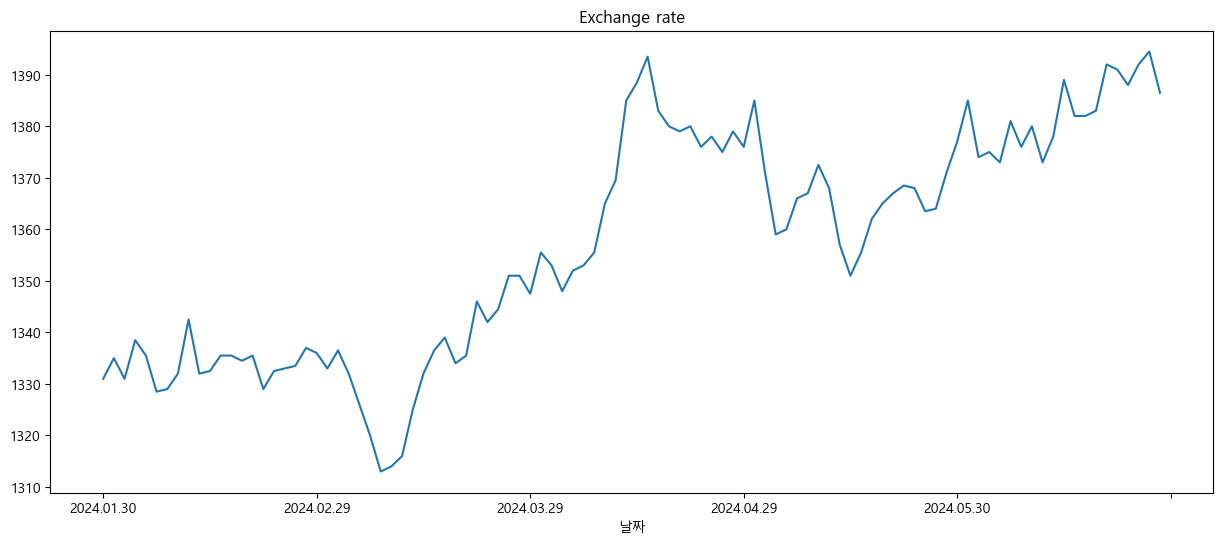

In [61]:
# 챠트 크기를 바꾸기, 제목 넣기, 한글인식
df_total_chart['매매기준율'].plot(figsize=(15, 6), title='Exchange rate')

## 월별검색

In [62]:
df_total

,날짜,매매기준율,사실 때,파실 때,보내실 때,받으실 때
0,2024.06.27,1386.5,1410.76,1362.24,1400.0,1373.0
1,2024.06.26,1394.5,1418.90,1370.10,1408.1,1380.9
2,2024.06.25,1392.0,1416.36,1367.64,1405.6,1378.4
3,2024.06.24,1388.0,1412.29,1363.71,1401.6,1374.4
4,2024.06.21,1391.0,1415.34,1366.66,1404.6,1377.4
...,...,...,...,...,...,...
5,2024.02.05,1335.5,1358.87,1312.13,1348.5,1322.5
6,2024.02.02,1338.5,1361.92,1315.08,1351.6,1325.4
7,2024.02.01,1331.0,1354.29,1307.71,1344.0,1318.0
8,2024.01.31,1335.0,1358.36,1311.64,1348.0,1322.0


In [63]:
# 날짜 컬럼에 .을 없앤다. 형변환 (문자열 0> 날짜형식)

df_total['날짜'] = df_total['날짜'].str.replace(".","") # 열전체 할때 .str
df_total


,날짜,매매기준율,사실 때,파실 때,보내실 때,받으실 때
0,20240627,1386.5,1410.76,1362.24,1400.0,1373.0
1,20240626,1394.5,1418.90,1370.10,1408.1,1380.9
2,20240625,1392.0,1416.36,1367.64,1405.6,1378.4
3,20240624,1388.0,1412.29,1363.71,1401.6,1374.4
4,20240621,1391.0,1415.34,1366.66,1404.6,1377.4
...,...,...,...,...,...,...
5,20240205,1335.5,1358.87,1312.13,1348.5,1322.5
6,20240202,1338.5,1361.92,1315.08,1351.6,1325.4
7,20240201,1331.0,1354.29,1307.71,1344.0,1318.0
8,20240131,1335.0,1358.36,1311.64,1348.0,1322.0


In [64]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      100 non-null    object 
 1   매매기준율   100 non-null    float64
 2   사실 때    100 non-null    float64
 3   파실 때    100 non-null    float64
 4   보내실 때   100 non-null    float64
 5   받으실 때   100 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.5+ KB


In [65]:
# 형까지 변환 ;  datetime64[ms]
df_total['날짜'] = df_total['날짜'].str.replace(".","").astype('datetime64[ms]')
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      100 non-null    datetime64[ms]
 1   매매기준율   100 non-null    float64       
 2   사실 때    100 non-null    float64       
 3   파실 때    100 non-null    float64       
 4   보내실 때   100 non-null    float64       
 5   받으실 때   100 non-null    float64       
dtypes: datetime64[ms](1), float64(5)
memory usage: 5.5 KB


In [66]:
# 월이라는 컬럼 생성 (파생변수)
df_total['월'] = df_total['날짜'].dt.month
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 9
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      100 non-null    datetime64[ms]
 1   매매기준율   100 non-null    float64       
 2   사실 때    100 non-null    float64       
 3   파실 때    100 non-null    float64       
 4   보내실 때   100 non-null    float64       
 5   받으실 때   100 non-null    float64       
 6   월       100 non-null    int32         
dtypes: datetime64[ms](1), float64(5), int32(1)
memory usage: 5.9 KB


In [67]:
# 임의월 입력 받기
month_in = int(input("검색할 월 입력>>>"))
# 입력받은 월만 출력하기
month_df = df_total.loc[df_total['월']==month_in, ['날짜', '매매기준율', '사실 때', '파실 때', '보내실 때', '받으실 때']]
# 인덱스
# month_df[::-1].reset_index(drop=True)
month_df = month_df.reset_index(drop=True)
month_df

,날짜,매매기준율,사실 때,파실 때,보내실 때,받으실 때
0,2024-03-29,1347.5,1371.08,1323.92,1360.7,1334.3
1,2024-03-28,1351.0,1374.64,1327.36,1364.2,1337.8
2,2024-03-27,1351.0,1374.64,1327.36,1364.2,1337.8
3,2024-03-26,1344.5,1368.02,1320.98,1357.6,1331.4
4,2024-03-25,1342.0,1365.48,1318.52,1355.1,1328.9
5,2024-03-22,1346.0,1369.55,1322.45,1359.1,1332.9
6,2024-03-21,1335.5,1358.87,1312.13,1348.5,1322.5
7,2024-03-20,1334.0,1357.34,1310.66,1347.0,1321.0
8,2024-03-19,1339.0,1362.43,1315.57,1352.1,1325.9
9,2024-03-18,1336.5,1359.88,1313.12,1349.5,1323.5


In [68]:
# 복사 해두기
month_df_chart = month_df.copy()

In [69]:
month_df_chart = month_df_chart.set_index('날짜')

<Axes: xlabel='날짜'>

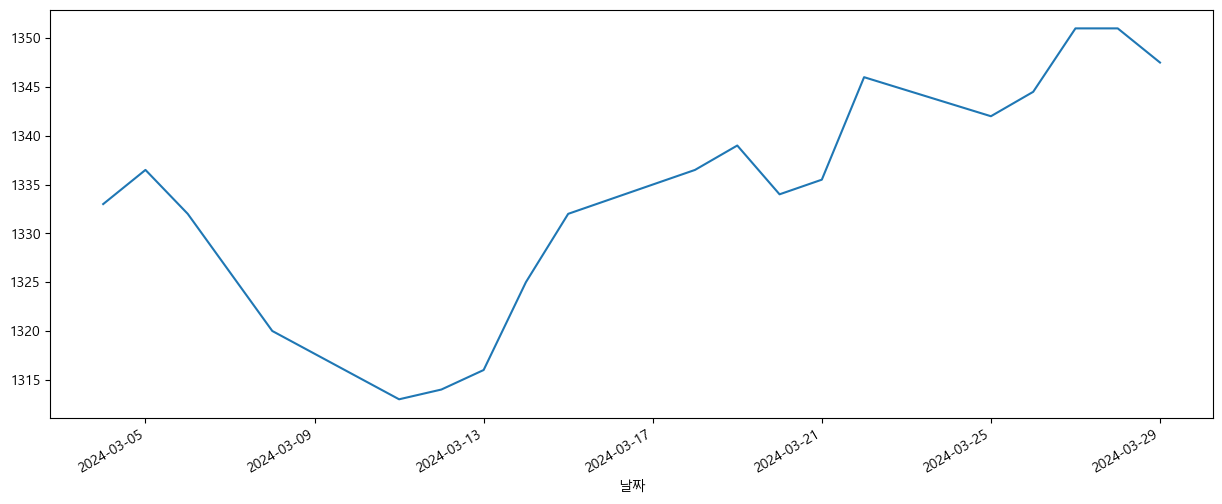

In [70]:
month_df_chart['매매기준율'].plot(figsize=(15, 6))